In [1]:
import os

import torch
import torch.nn.functional as F

import numpy as np
import pandas as pd
import datetime
from datetime import datetime as dt

In [2]:
data_path = "./user01-06/user06"
dir_list = os.listdir(data_path)

user_all_data = []

for item in dir_list:
    csv_file = data_path + "/" + item + "/" + item + "_label.csv"
    rdr = pd.read_csv(csv_file)
    user_all_data.append(rdr)
        

df_all = pd.concat(user_all_data, axis=0)
df_all['ts']=pd.to_datetime(df_all['ts'], unit='s')
df_all

,ts,action,actionOption,actionSub,actionSubOption,condition,conditionSub1Option,conditionSub2Option,place,emotionPositive,emotionTension,activity
0,2020-10-01 15:00:00,socialising,711,NaN,NaN,WITH_ONE,4.0,3.0,other_indoor,6,3,4
1,2020-10-01 15:01:00,socialising,711,NaN,NaN,WITH_ONE,4.0,3.0,other_indoor,6,3,2
2,2020-10-01 15:02:00,socialising,711,NaN,NaN,WITH_ONE,4.0,3.0,other_indoor,6,3,2
3,2020-10-01 15:03:00,socialising,711,NaN,NaN,WITH_ONE,4.0,3.0,other_indoor,6,3,2
4,2020-10-01 15:04:00,socialising,711,NaN,NaN,WITH_ONE,4.0,3.0,other_indoor,6,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
959,2020-09-29 14:54:00,recreation_media,725,NaN,NaN,ALONE,NaN,NaN,home,3,3,3
960,2020-09-29 14:55:00,recreation_media,725,NaN,NaN,ALONE,NaN,NaN,home,3,3,3
961,2020-09-29 14:56:00,recreation_media,725,NaN,NaN,ALONE,NaN,NaN,home,3,3,3
962,2020-09-29 14:57:00,recreation_media,725,NaN,NaN,ALONE,NaN,NaN,home,3,3,3


In [3]:
df_all = df_all.drop(columns=['actionSub', 'actionSubOption', 'condition', 'conditionSub1Option', 'conditionSub2Option'])

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
action_encoded = le.fit_transform(df_all['action'])
place_encoded = le.fit_transform(df_all['place'])

In [5]:
df_all['action'] = action_encoded
df_all['place'] = place_encoded

In [6]:
df_all

,ts,action,actionOption,place,emotionPositive,emotionTension,activity
0,2020-10-01 15:00:00,9,711,1,6,3,4
1,2020-10-01 15:01:00,9,711,1,6,3,2
2,2020-10-01 15:02:00,9,711,1,6,3,2
3,2020-10-01 15:03:00,9,711,1,6,3,2
4,2020-10-01 15:04:00,9,711,1,6,3,2
...,...,...,...,...,...,...,...
959,2020-09-29 14:54:00,6,725,0,3,3,3
960,2020-09-29 14:55:00,6,725,0,3,3,3
961,2020-09-29 14:56:00,6,725,0,3,3,3
962,2020-09-29 14:57:00,6,725,0,3,3,3


In [7]:
# sub_path = data_path + "/" +'1599757200'+ "/" + "e4Bvp"
# sub_list = os.listdir(sub_path)

sub_Bvp_data = []

for item in dir_list:
    sub_path = data_path + "/" + item + "/" + "e4Bvp"
    sub_list = os.listdir(sub_path)
    for i in sub_list:
        rdr = pd.read_csv(sub_path + "/" + i)
        if "lock" in i:
            continue
        time = int(i[:-4])
        mean = rdr["value"].mean()
        sub_Bvp_data.append([time, mean])

In [8]:
df_e4Bvp = pd.DataFrame(sub_Bvp_data, columns=['ts', 'e4Bvp'])
df_e4Bvp['ts']=pd.to_datetime(df_e4Bvp['ts'], unit='s')
df_e4Bvp

,ts,e4Bvp
0,2020-10-02 14:07:00,-0.520773
1,2020-10-02 06:58:00,0.702159
2,2020-10-02 12:09:00,0.018242
3,2020-10-02 11:08:00,-0.031394
4,2020-10-01 15:09:00,-0.369089
...,...,...
18095,2020-09-29 10:01:00,0.037232
18096,2020-09-29 11:06:00,-0.434482
18097,2020-09-29 10:49:00,-0.415576
18098,2020-09-29 10:41:00,-0.145146


In [9]:
df_tmp2 = pd.merge(df_all, df_e4Bvp, on='ts')
df_tmp2

,ts,action,actionOption,place,emotionPositive,emotionTension,activity,e4Bvp
0,2020-10-01 15:00:00,9,711,1,6,3,4,0.974827
1,2020-10-01 15:01:00,9,711,1,6,3,2,-0.277211
2,2020-10-01 15:02:00,9,711,1,6,3,2,-0.632042
3,2020-10-01 15:03:00,9,711,1,6,3,2,0.146029
4,2020-10-01 15:04:00,9,711,1,6,3,2,0.307901
...,...,...,...,...,...,...,...,...
18325,2020-09-29 14:54:00,6,725,0,3,3,3,-0.095721
18326,2020-09-29 14:55:00,6,725,0,3,3,3,0.165891
18327,2020-09-29 14:56:00,6,725,0,3,3,3,-0.198955
18328,2020-09-29 14:57:00,6,725,0,3,3,3,0.180758


In [10]:
sub_Eda_data = []

for item in dir_list:
    sub_path = data_path + "/" + item + "/" + "e4Eda"
    sub_list = os.listdir(sub_path)
    for i in sub_list:
        rdr = pd.read_csv(sub_path + "/" + i)
        if "lock" in i:
            continue
        time = int(i[:-4])
        mean = rdr["eda"].mean()
        sub_Eda_data.append([time, mean])

In [11]:
df_e4Eda = pd.DataFrame(sub_Eda_data, columns=['ts', 'e4Eda'])
df_e4Eda['ts']=pd.to_datetime(df_e4Eda['ts'], unit='s')
df_e4Eda

,ts,e4Eda
0,2020-10-02 14:07:00,0.461474
1,2020-10-02 06:58:00,0.147330
2,2020-10-02 12:09:00,0.214282
3,2020-10-02 11:08:00,0.353770
4,2020-10-01 15:09:00,0.198887
...,...,...
18010,2020-09-29 10:01:00,1.336809
18011,2020-09-29 11:06:00,0.969317
18012,2020-09-29 10:49:00,1.896447
18013,2020-09-29 10:41:00,1.929531


In [12]:
df_tmp3 = pd.merge(df_tmp2, df_e4Eda, on='ts')
df_tmp3

,ts,action,actionOption,place,emotionPositive,emotionTension,activity,e4Bvp,e4Eda
0,2020-10-01 15:00:00,9,711,1,6,3,4,0.974827,0.185119
1,2020-10-01 15:01:00,9,711,1,6,3,2,-0.277211,0.245071
2,2020-10-01 15:02:00,9,711,1,6,3,2,-0.632042,0.213994
3,2020-10-01 15:03:00,9,711,1,6,3,2,0.146029,0.171902
4,2020-10-01 15:04:00,9,711,1,6,3,2,0.307901,0.138282
...,...,...,...,...,...,...,...,...,...
18240,2020-09-29 14:54:00,6,725,0,3,3,3,-0.095721,0.887829
18241,2020-09-29 14:55:00,6,725,0,3,3,3,0.165891,0.997108
18242,2020-09-29 14:56:00,6,725,0,3,3,3,-0.198955,0.911925
18243,2020-09-29 14:57:00,6,725,0,3,3,3,0.180758,0.800185


In [13]:
sub_Hr_data = []

for item in dir_list:
    sub_path = data_path + "/" + item + "/" + "e4Hr"
    sub_list = os.listdir(sub_path)
    for i in sub_list:
        rdr = pd.read_csv(sub_path + "/" + i)
        if "lock" in i:
            continue
        time = int(i[:-4])
        mean = rdr["hr"].mean()
        sub_Hr_data.append([time, mean])

In [14]:
df_e4Hr = pd.DataFrame(sub_Eda_data, columns=['ts', 'e4Hr'])
df_e4Hr['ts']=pd.to_datetime(df_e4Eda['ts'], unit='s')
df_e4Hr

,ts,e4Hr
0,2020-10-02 14:07:00,0.461474
1,2020-10-02 06:58:00,0.147330
2,2020-10-02 12:09:00,0.214282
3,2020-10-02 11:08:00,0.353770
4,2020-10-01 15:09:00,0.198887
...,...,...
18010,2020-09-29 10:01:00,1.336809
18011,2020-09-29 11:06:00,0.969317
18012,2020-09-29 10:49:00,1.896447
18013,2020-09-29 10:41:00,1.929531


In [15]:
df_tmp4 = pd.merge(df_tmp3, df_e4Hr, on='ts')
df_tmp4

,ts,action,actionOption,place,emotionPositive,emotionTension,activity,e4Bvp,e4Eda,e4Hr
0,2020-10-01 15:00:00,9,711,1,6,3,4,0.974827,0.185119,0.185119
1,2020-10-01 15:01:00,9,711,1,6,3,2,-0.277211,0.245071,0.245071
2,2020-10-01 15:02:00,9,711,1,6,3,2,-0.632042,0.213994,0.213994
3,2020-10-01 15:03:00,9,711,1,6,3,2,0.146029,0.171902,0.171902
4,2020-10-01 15:04:00,9,711,1,6,3,2,0.307901,0.138282,0.138282
...,...,...,...,...,...,...,...,...,...,...
18240,2020-09-29 14:54:00,6,725,0,3,3,3,-0.095721,0.887829,0.887829
18241,2020-09-29 14:55:00,6,725,0,3,3,3,0.165891,0.997108,0.997108
18242,2020-09-29 14:56:00,6,725,0,3,3,3,-0.198955,0.911925,0.911925
18243,2020-09-29 14:57:00,6,725,0,3,3,3,0.180758,0.800185,0.800185


In [16]:
sub_Temp_data = []

for item in dir_list:
    sub_path = data_path + "/" + item + "/" + "e4Temp"
    sub_list = os.listdir(sub_path)
    for i in sub_list:
        rdr = pd.read_csv(sub_path + "/" + i)
        if "lock" in i:
            continue
        time = int(i[:-4])
        mean = rdr["temp"].mean()
        sub_Hr_data.append([time, mean])

In [19]:
df_e4Temp = pd.DataFrame(sub_Eda_data, columns=['ts', 'e4Temp'])
df_e4Temp['ts']=pd.to_datetime(df_e4Eda['ts'], unit='s')
df_e4Temp

,ts,e4Temp
0,2020-10-02 14:07:00,0.461474
1,2020-10-02 06:58:00,0.147330
2,2020-10-02 12:09:00,0.214282
3,2020-10-02 11:08:00,0.353770
4,2020-10-01 15:09:00,0.198887
...,...,...
18010,2020-09-29 10:01:00,1.336809
18011,2020-09-29 11:06:00,0.969317
18012,2020-09-29 10:49:00,1.896447
18013,2020-09-29 10:41:00,1.929531


In [20]:
df_tmp5 = pd.merge(df_tmp4, df_e4Temp, on='ts')
df_tmp5

,ts,action,actionOption,place,emotionPositive,emotionTension,activity,e4Bvp,e4Eda,e4Hr,e4Temp
0,2020-10-01 15:00:00,9,711,1,6,3,4,0.974827,0.185119,0.185119,0.185119
1,2020-10-01 15:01:00,9,711,1,6,3,2,-0.277211,0.245071,0.245071,0.245071
2,2020-10-01 15:02:00,9,711,1,6,3,2,-0.632042,0.213994,0.213994,0.213994
3,2020-10-01 15:03:00,9,711,1,6,3,2,0.146029,0.171902,0.171902,0.171902
4,2020-10-01 15:04:00,9,711,1,6,3,2,0.307901,0.138282,0.138282,0.138282
...,...,...,...,...,...,...,...,...,...,...,...
18240,2020-09-29 14:54:00,6,725,0,3,3,3,-0.095721,0.887829,0.887829,0.887829
18241,2020-09-29 14:55:00,6,725,0,3,3,3,0.165891,0.997108,0.997108,0.997108
18242,2020-09-29 14:56:00,6,725,0,3,3,3,-0.198955,0.911925,0.911925,0.911925
18243,2020-09-29 14:57:00,6,725,0,3,3,3,0.180758,0.800185,0.800185,0.800185


In [24]:
import seaborn as sns

In [25]:
df_tmp5.corr()

,action,actionOption,place,emotionPositive,emotionTension,activity,e4Bvp,e4Eda,e4Hr,e4Temp
action,1.000000,-0.456829,0.688549,-0.402891,0.323790,-0.036211,0.007644,0.178011,0.178011,0.178011
actionOption,-0.456829,1.000000,-0.585552,0.388538,-0.233476,0.099171,0.010760,-0.204255,-0.204255,-0.204255
place,0.688549,-0.585552,1.000000,-0.424762,0.356894,-0.033602,0.003750,0.107043,0.107043,0.107043
emotionPositive,-0.402891,0.388538,-0.424762,1.000000,-0.430240,0.029662,-0.004574,-0.022899,-0.022899,-0.022899
emotionTension,0.323790,-0.233476,0.356894,-0.430240,1.000000,0.002599,-0.000357,0.069388,0.069388,0.069388
activity,-0.036211,0.099171,-0.033602,0.029662,0.002599,1.000000,-0.003022,-0.093026,-0.093026,-0.093026
e4Bvp,0.007644,0.010760,0.003750,-0.004574,-0.000357,-0.003022,1.000000,0.006080,0.006080,0.006080
e4Eda,0.178011,-0.204255,0.107043,-0.022899,0.069388,-0.093026,0.006080,1.000000,1.000000,1.000000
e4Hr,0.178011,-0.204255,0.107043,-0.022899,0.069388,-0.093026,0.006080,1.000000,1.000000,1.000000
e4Temp,0.178011,-0.204255,0.107043,-0.022899,0.069388,-0.093026,0.006080,1.000000,1.000000,1.000000


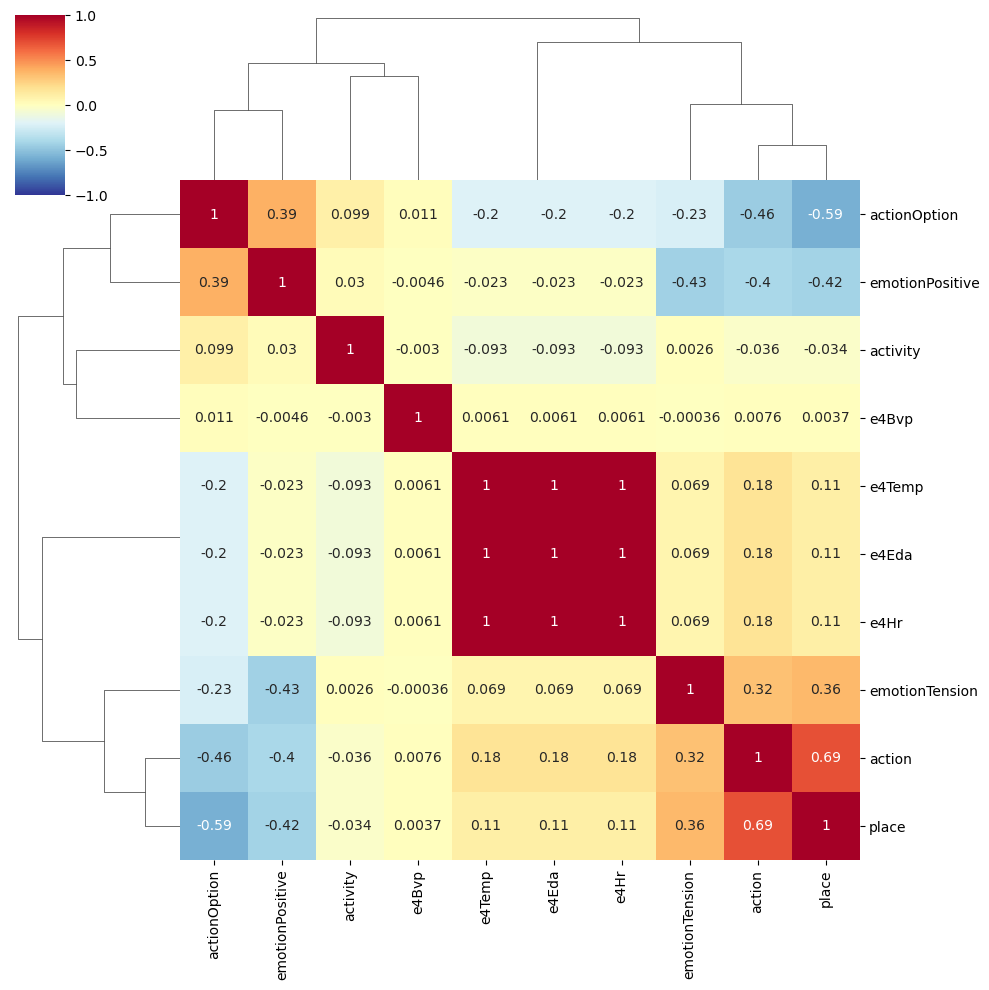

In [26]:
sns.clustermap(df_tmp5.corr(), 
               annot = True,
               cmap = 'RdYlBu_r',
               vmin = -1, vmax = 1,
              )